# Case Study : Aerofit

About Aerofit: Aerofit is a leading brand in the field of fitness equipment.Aerofit provides a product range including machines such as treadmills,exercise bikes,gym equipment,and fitness accessories to cater to the needs of all categories of people.

Problem Statement: The market research team at Aerofit wants to identify the characteristics of the target audience for each type of treadmill offered by the company,to provide a better recommendation of the treadmills to the new customers.The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Our Objective:

1.Perform descriptive analytics to create a customer profile for each Aerofit treadmill product by developing appropriate tables and charts.

2.For each Aerofit treadmill product,construct two-way contigency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749


Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /content/aerofit_treadmill.csv?1639992749
100% 7.28k/7.28k [00:00<00:00, 17.9MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/aerofit_treadmill.csv?1639992749")

# Basic Metrics and Structure of Data

In [ ]:
df.describe()


,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Total count of all columns is 180

Age: Mean age of the customer is 28 years, half of the customer's mean age is 26.

Education: Mean Education is 15 with maximum as 21 and minimum as 12.

Usage: Mean Usage per week is 3.4, with maximum as 7 and minimum as 2.

Fitness: Average rating is 3.3 on a scale of 1 to 5.

Miles: Average number of miles the customer walks is 103 with maximum distance travelled by most people is almost 115 and minimum is 21.

Income (in $): Most customer earns around 58K annually, with maximum of 104K and minimum almost 30K

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Product, Gender and Marital Status are string.

Age, Education, Usage, Fitness, Income and Miles are in integer.

There exists 3 types of Product:
The KP281 is an entry-level treadmill that sells for $1,500.

The KP781 treadmill is having advanced features that sell for $2,500.

The KP481 is for mid_level runners that sell for $1750



MaritialStatus is divided into two Categories
Single
Partnered


There is no null value in the data set

In [ ]:
df.shape

(180, 9)

*180 Rows And 9 Columns*

In [ ]:
df.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.tail(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200
172,KP781,34,Male,16,Single,5,5,92131,150
173,KP781,35,Male,16,Partnered,4,5,92131,360
174,KP781,38,Male,18,Partnered,5,5,104581,150
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
# Counting values of Category Columns
print(df.Product.value_counts())
print('-'*50)
print(df.MaritalStatus.value_counts())
print('-'*50)
print (df.Gender.value_counts())

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64
--------------------------------------------------
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
--------------------------------------------------
Male      104
Female     76
Name: Gender, dtype: int64


# Conversion of Categorical Attributes to New Category



In [ ]:
df['Fitness_Scale']=df['Fitness'].map({1:'Unsatisfactory',2:'Mediocre',3:'Satisfactory',4:'Satisfactory',5:'Outstanding'})
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_Scale
0,KP281,18,Male,14,Single,3,4,29562,112,Satisfactory
1,KP281,19,Male,15,Single,2,3,31836,75,Satisfactory
2,KP281,19,Female,14,Partnered,4,3,30699,66,Satisfactory
3,KP281,19,Male,12,Single,3,3,32973,85,Satisfactory
4,KP281,20,Male,13,Partnered,4,2,35247,47,Mediocre
5,KP281,20,Female,14,Partnered,3,3,32973,66,Satisfactory
6,KP281,21,Female,14,Partnered,3,3,35247,75,Satisfactory
7,KP281,21,Male,13,Single,3,3,32973,85,Satisfactory
8,KP281,21,Male,15,Single,5,4,35247,141,Satisfactory
9,KP281,21,Female,15,Partnered,2,3,37521,85,Satisfactory


Here,I have converted the categorical attribute i.e fitness to category.The scale is:

1 - Unsatisfactory

2 - Mediocre

3 - Satisfactory

4 - Satisfactory

5 - Outstanding.

# Checking Outliers

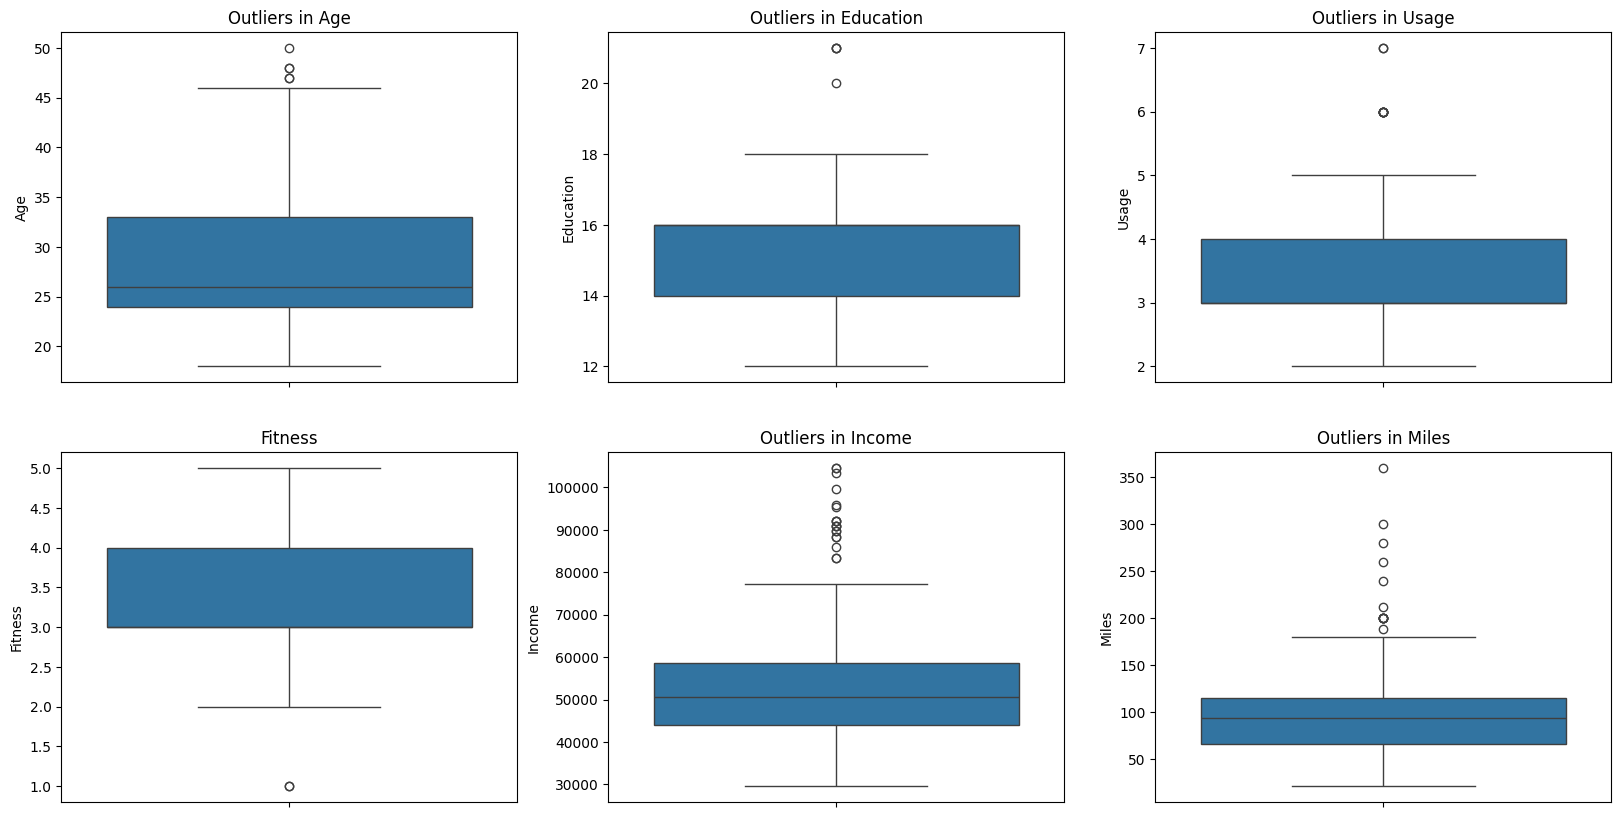

In [ ]:
fig = plt.figure(figsize = (20,10))
plt.subplot(2,3,1)
sns.boxplot(df['Age'])
plt.title('Outliers in Age')

plt.subplot(2,3,2)
sns.boxplot(df['Education'])
plt.title('Outliers in Education')

plt.subplot(2,3,3)
sns.boxplot(df['Usage'])
plt.title('Outliers in Usage')


plt.subplot(2,3,4)
sns.boxplot(df['Fitness'])
plt.title('Fitness')


plt.subplot(2,3,5)
sns.boxplot(df['Income'])
plt.title('Outliers in Income')


plt.subplot(2,3,6)
sns.boxplot(df['Miles'])
plt.title('Outliers in Miles')
plt.show()

#Non-Graphical Analysis:Value Counts and Unique Attributes.





In [ ]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [ ]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
df['Fitness'].value_counts().sort_index()

1     2
2    26
3    97
4    24
5    31
Name: Fitness, dtype: int64

In [ ]:
df['Usage'].value_counts().sort_index()

2    33
3    69
4    52
5    17
6     7
7     2
Name: Usage, dtype: int64

1. KP281, KP481, and KP781 are the three distinct goods; KP281 is the most sold, followed by KP481 and KP781.The products' prices—KP281 being the least expensive and KP781 being the most expensive—are the cause.


2. The sex ratio is good, with 104 men and 76 women, showing that women also frequently utilize the product.

3. The fact that there are 107 married couples and 73 single people suggests that married couples are more likely than single people to purchase the product.

4. Most clients use treadmills three to four days a week on average

#Visual Analysis - Univariate & Bivariate :-

For continuous variable(s): Distplot, countplot, histogram

for univariate analysis

For categorical variable(s): Boxplot

For correlation: Heatmaps, Pairplots

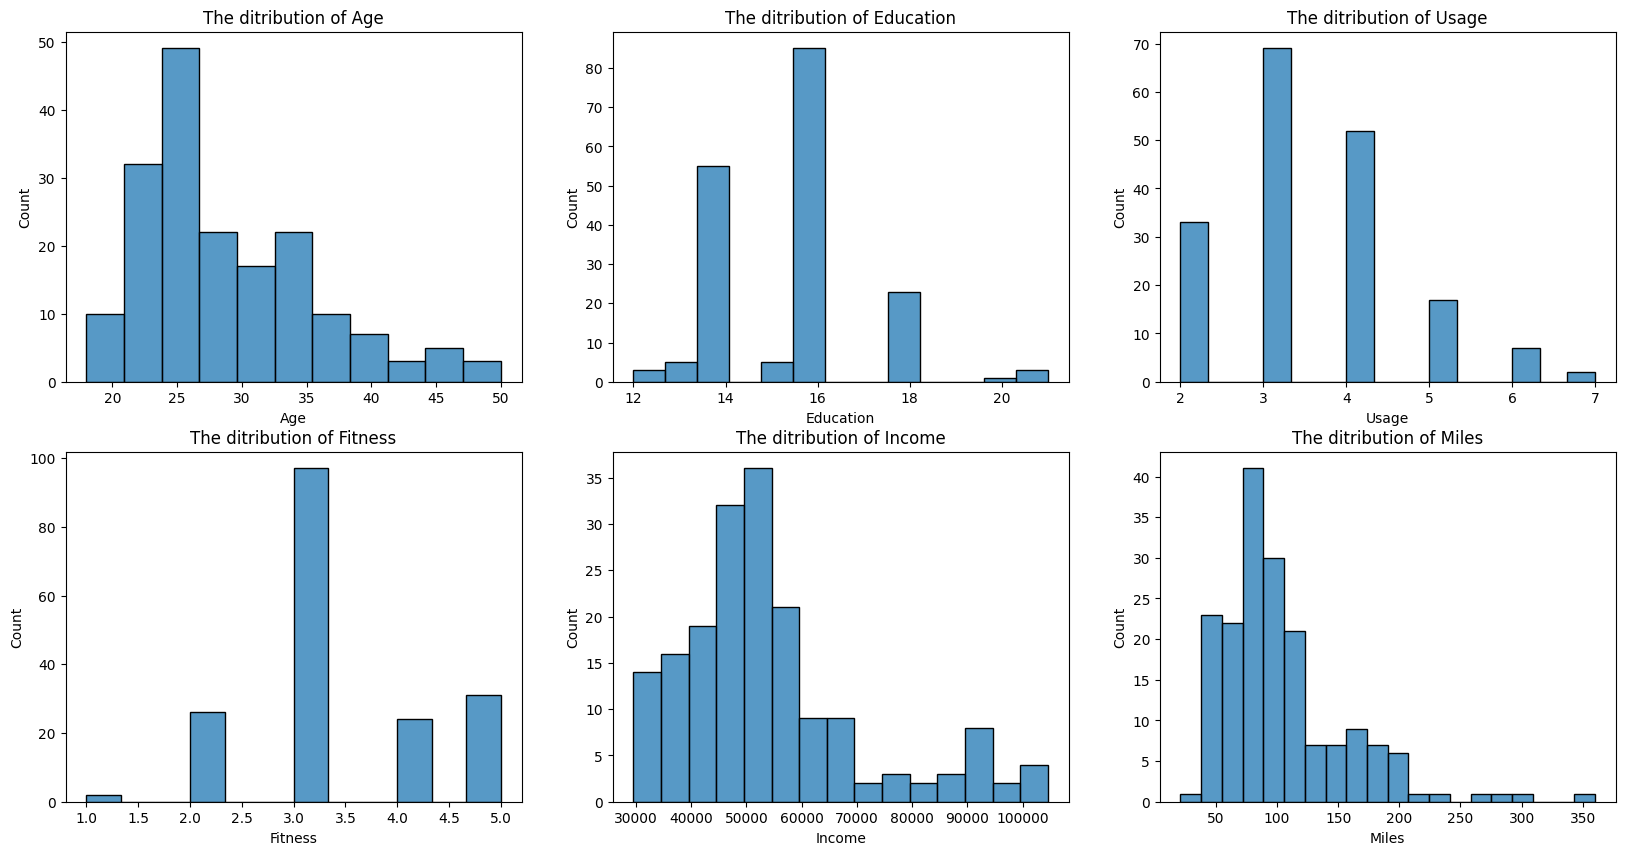

In [23]:
#checking if the data is normally distributed in the  Age,Education,Usage,Fitness,Income,Miles using Boxplot.
fig = plt.figure(figsize = (20,10))
plt.subplot(2,3,1)
sns.histplot(df['Age'])
plt.title('The ditribution of Age')

plt.subplot(2,3,2)
sns.histplot(df['Education'])
plt.title('The ditribution of Education')

plt.subplot(2,3,3)
sns.histplot(df['Usage'])
plt.title('The ditribution of Usage')


plt.subplot(2,3,4)
sns.histplot(df['Fitness'])
plt.title('The ditribution of Fitness')


plt.subplot(2,3,5)
sns.histplot(df['Income'])
plt.title('The ditribution of Income')


plt.subplot(2,3,6)
sns.histplot(df['Miles'])
plt.title('The ditribution of Miles')
plt.show()

In [24]:
fraction=df['Product'].value_counts(normalize=True)
print(fraction)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64


This represents the fractional value of all the 3 products.


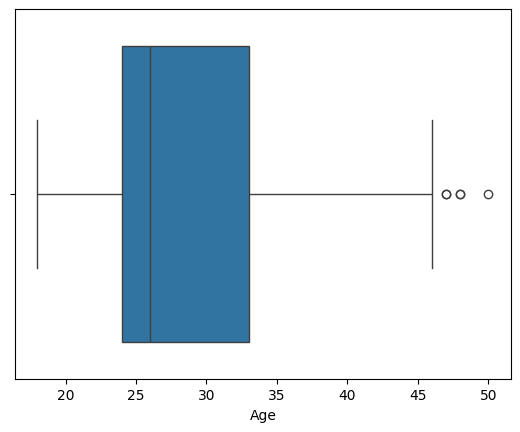

In [25]:
sns.boxplot(data=df,x='Age')
plt.show()

This indicates that younger consumers—those in the 24 to 33 year old age range are purchasing more products for their physical well-being.

This boxplot has three outliers.

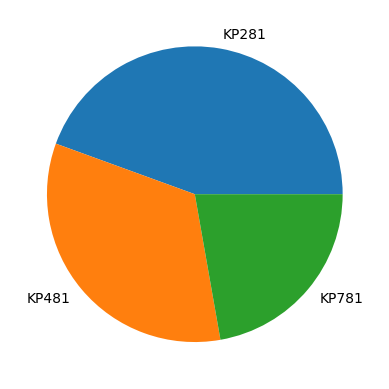

In [26]:
x=np.array([0.44444,0.33333,0.22222])
pie_chart=["KP281","KP481","KP781"]
plt.pie(x,labels=pie_chart)
plt.show()

This represents that the product KP281 has the maximum sale followed by KP481 and of KP781.

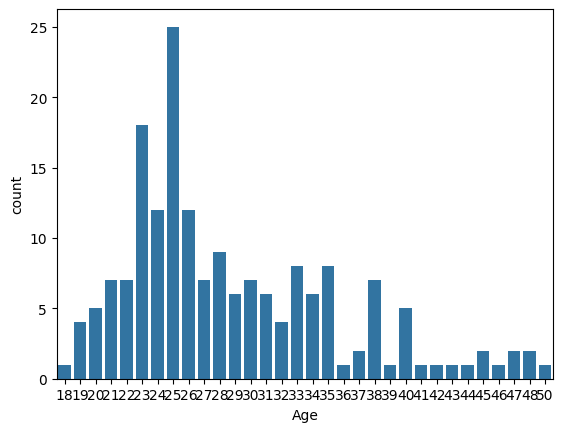

In [27]:
sns.countplot(data=df,x='Age')
plt.show()

And the above point is proved by this graph because the highest density is between 23-35 years.

In [30]:
fraction=df['Gender'].value_counts(normalize=True)
print(fraction)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64


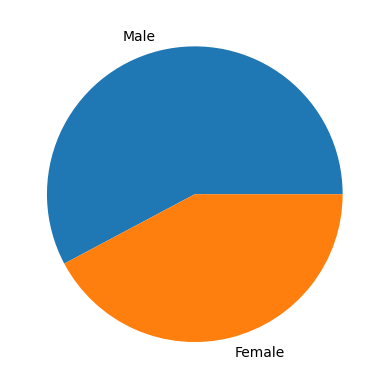

In [31]:
x=np.array([0.577778,0.422222])
pie_chart=["Male","Female"]
plt.pie(x,labels=pie_chart)
plt.show()

This indicates that there are more men than women purchasing the products, indicating a gender ratio of more male to female buyers.

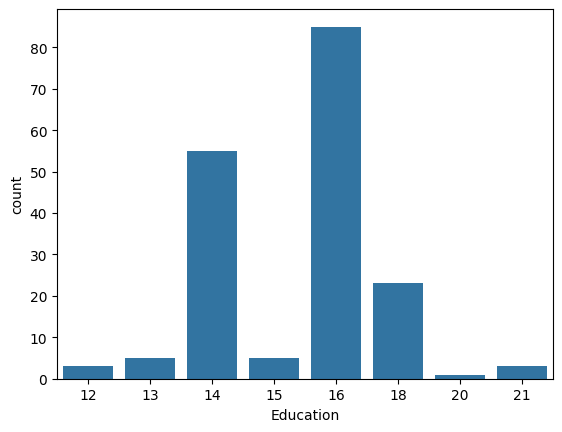

In [32]:
sns.countplot(data=df,x='Education')
plt.show()

This shows that people with education of 14-16 years are the customers who buy the products more.

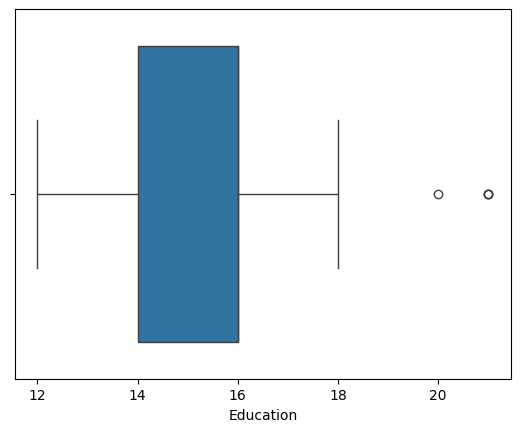

In [33]:
sns.boxplot(data=df,x='Education')
plt.show()

The above statement being proved by the boxplot that the maximum density lies between 14 to 16 years of education.

**There are 2 outliers present in this boxplot**

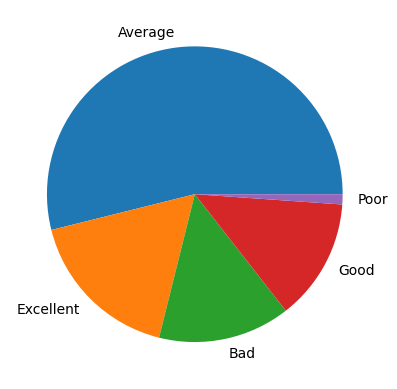

In [34]:
x=np.array([0.538889,0.172222,0.144444,0.133333,0.011111])
pie_chart=["Average","Excellent","Bad","Good","Poor"]
plt.pie(x,labels=pie_chart)
plt.show()

The majority of clients who utilize the product have typical body shapes, as this pie chart illustrates.Numerous clients are in excellent shape, while some are in both good and poor shape.Very few, despite utilizing the product, are in terrible form.

In [36]:
less_salary=df[(df['Income']>=29562.000000)&(df['Income']<53719.577778)]
more_salary=df[(df['Income']>=53719.577778)&(df['Income']<=104581.000000)]

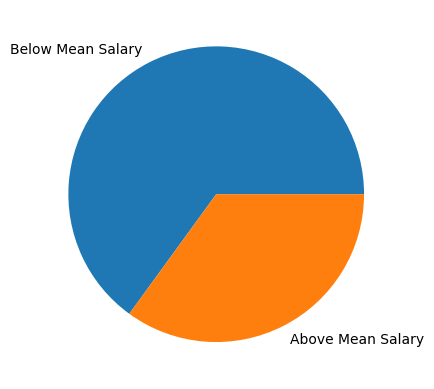

In [37]:
sizes=[
    len(less_salary),
    len(more_salary)
]
labels=['Below Mean Salary','Above Mean Salary']
plt.pie(sizes,labels=labels)
plt.show()

Here, I have divided the income category which is a categorical attribute into two groups: below mean salary and above mean pay.The data indicates that those with lower mean salaries are purchasing more products than those with higher mean salaries.

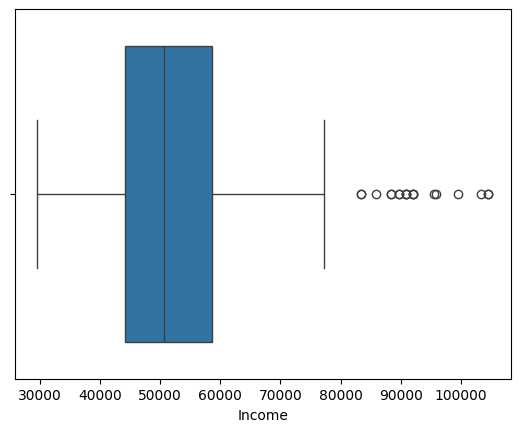

In [38]:
sns.boxplot(data=df,x='Income')
plt.show()


The maximum customers have around 45000-60000 salary.

There are 11 outliers present in this boxplot

In [39]:
less_miles=df[(df['Miles']>=21.0000)&(df['Miles']<103.194444)]
more_miles=df[(df['Miles']>=103.194444)&(df['Miles']<=360.000000)]

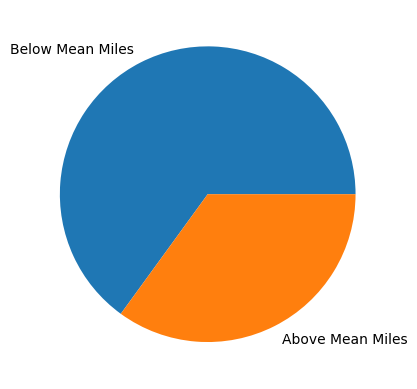

In [40]:
sizes=[
    len(less_miles),
    len(more_miles)
]
labels=['Below Mean Miles','Above Mean Miles']
plt.pie(sizes,labels=labels)
plt.show()

I have divided the categorical attribute miles into two categories: below mean miles and above mean miles.It demonstrates that a greater proportion of customers who have purchased the product have driven less miles than the norm. That is, there are more customers with mean miles below than above.

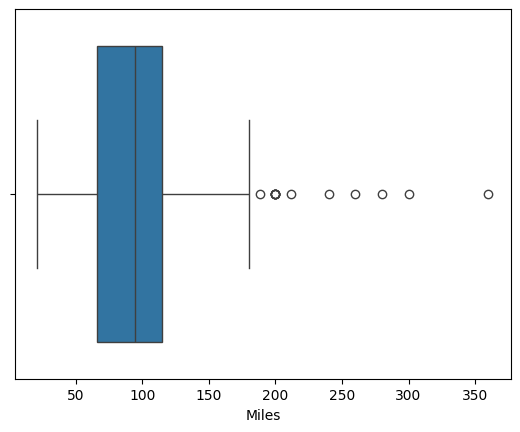

In [41]:
sns.boxplot(data=df,x='Miles')
plt.show()

This box plot shows that mostly the customers have travelled 60-105 miles by doing exercise via treadmill.

There are 9 outliers present in this boxplot

#Checking up for the correlation between columns

Using Heatmap to check for the correlation between the Numerical columns in the dataset. This help to know which columns are highly correalted to the other column

In [42]:
df1 = df[['Age','Income','Miles',"Usage"]]

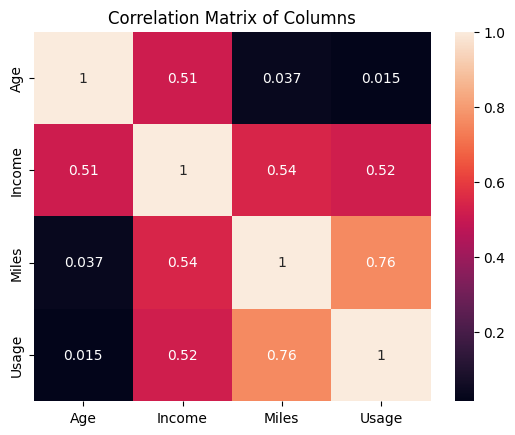

In [43]:
sns.heatmap(df1.corr(),annot = True)
plt.title('Correlation Matrix of Columns')
plt.show()

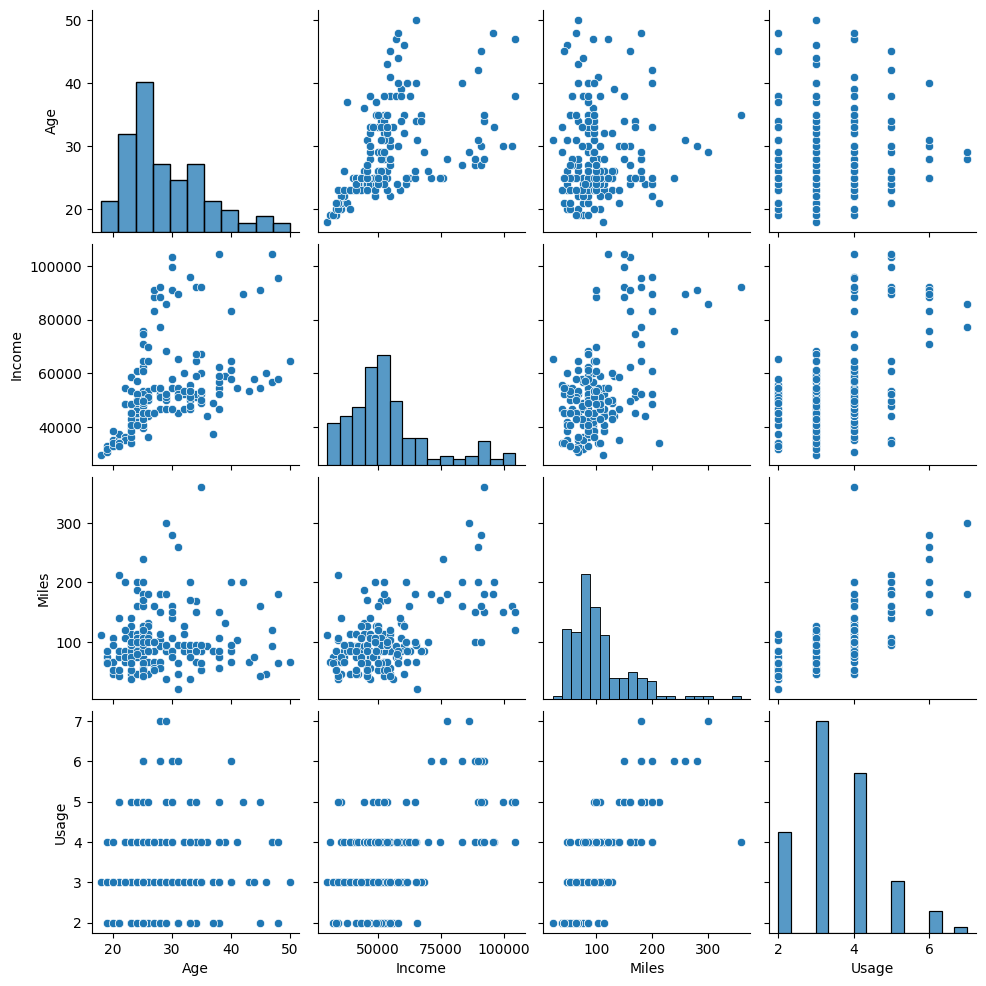

In [44]:
sns.pairplot(df1)
plt.show()

Age and income postive correlation. As the age is increasing income is also increasing

Income and miles are also positively correlated. As the income is increasing miles are also increasing

Age and Miles are related but behavious is random.

As the Usage increases the miles are also inceasing.

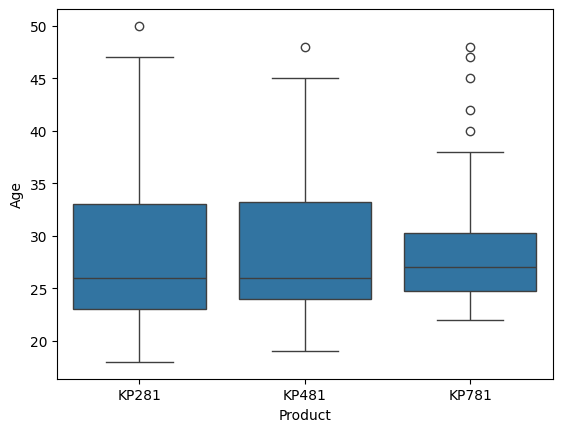

In [45]:
sns.boxplot(data=df,y='Age',x='Product')
plt.show()

KP281:Maximum customers are between age group 23 to 33 years.There are 1 outliers present in this boxplot

KP481:Maximum customers are between age group 24 to 33 years.There are 1 outliers present in this boxplot

KP781:Maximum customers are between age group 25 to 29 years.There are 5 outliers present in this boxplot


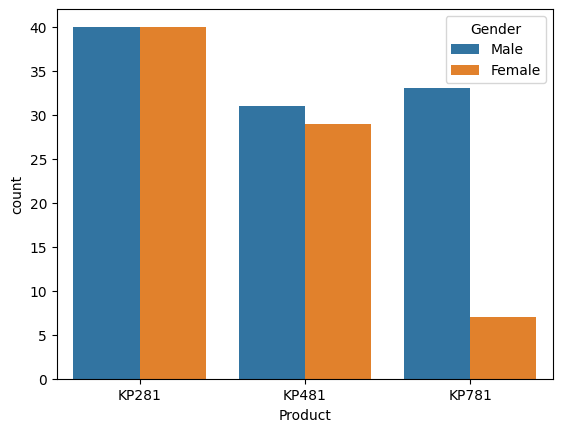

In [46]:
sns.countplot(data=df,x='Product',hue='Gender')
plt.show()

KP281:Male and female customers are equal buyers of this product.

KP481:Male customers are more than the female customers.

KP781:Male customers are much much more than female customers.

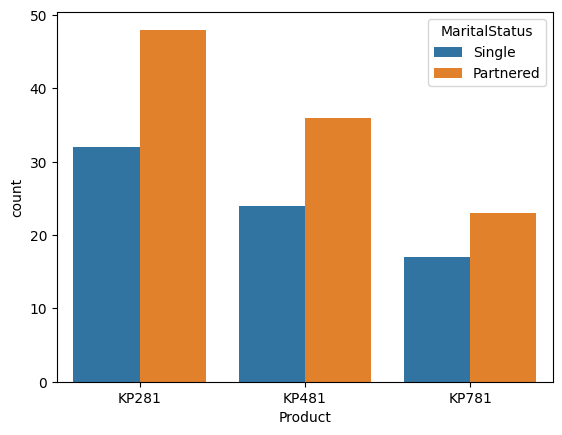

In [47]:
sns.countplot(data=df,x='Product',hue='MaritalStatus')
plt.show()

KP281:Married couples buy this product more than the singles.

KP481:Married couples buy this product more than the singles.

KP781:Married couples buy this product more than the singles.

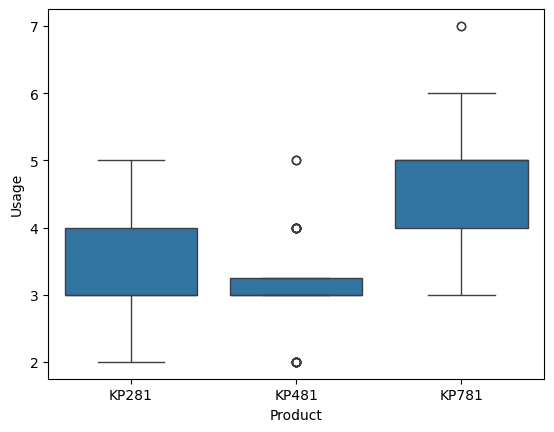

In [48]:
sns.boxplot(data=df,y='Usage',x='Product')
plt.show()

KP281:Customers who buy this product use it 3-4 times a week.There are 0 outliers present in this boxplot

KP481:Customers who buy this product use it 3 times a week.There are 6 outliers present in this boxplot

KP781:Customers who buy this product use it 4-5 times a week.There are 1 outliers present in this boxplot

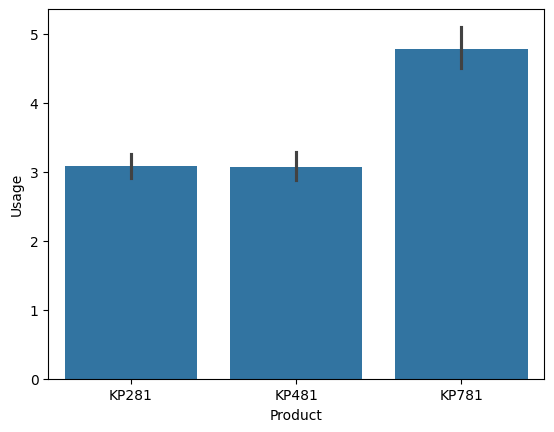

In [49]:
sns.barplot(data=df,y='Usage',x='Product')
plt.show()

The above statement being proved by this barplot.

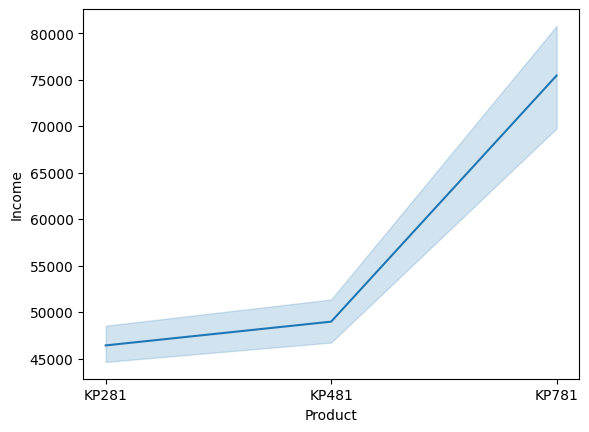

In [50]:
sns.lineplot(data=df,y='Income',x='Product')
plt.show()

The income of customers who buy KP781 is greater than that of the customers who bought KP481 and KP281.This is due to obvious reason because KP781 is more expensive than KP481 followed by KP281.

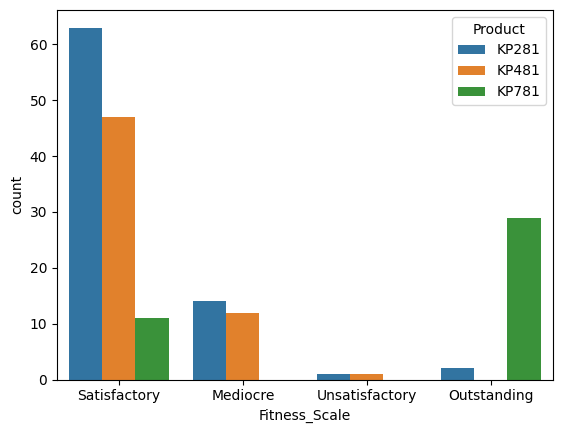

In [51]:
sns.countplot(data=df,x='Fitness_Scale',hue='Product')
plt.show()

Good shape:Among the customers who have built good shape,all the 3 products have been equally bought by the customers.

Average shape:Among the customers who have built average shape,KP281 was the most bought followed by KP481 and then KP781.

Bad shape:Among the customers who have bad shape,KP281 and KP481 were equally bought by the customers and no customer bought KP781.

Poor shape:Among the customers who have poor shape,KP281 and KP481 were equally bought by the customers but very few in number and no customer bought KP781.

Excellent shape:Among the customers who have built excellent shape,KP781 was most bought and very few KP281 were bought.No customer bought KP481.

<ipython-input-52-2adc72bdeb9a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap= "Blues",annot=True,vmin=-1)


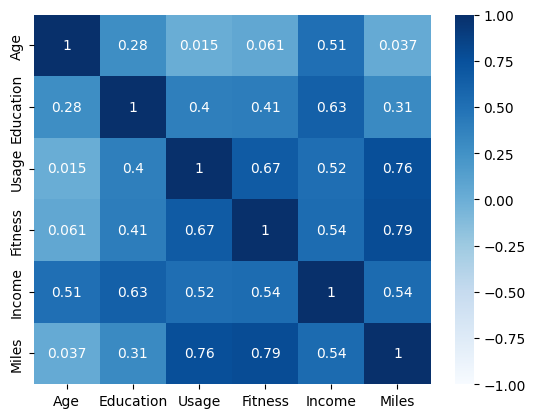

In [52]:
sns.heatmap(df.corr(), cmap= "Blues",annot=True,vmin=-1)
plt.show()

This is the heatmap which shows how the attributes are correlated to one another.

Age:It is more correlated to income and education.

Education:It is correlated to income,fitness,usage,age and miles.

Usage:It is correlated more to miles,income,fitness and education.

Fitness:It is correlated more to miles,income,usage and education.

Income:It is correlated to education,fitness,usage,age and miles.

Miles:It is correlated more to usage,income,fitness and education

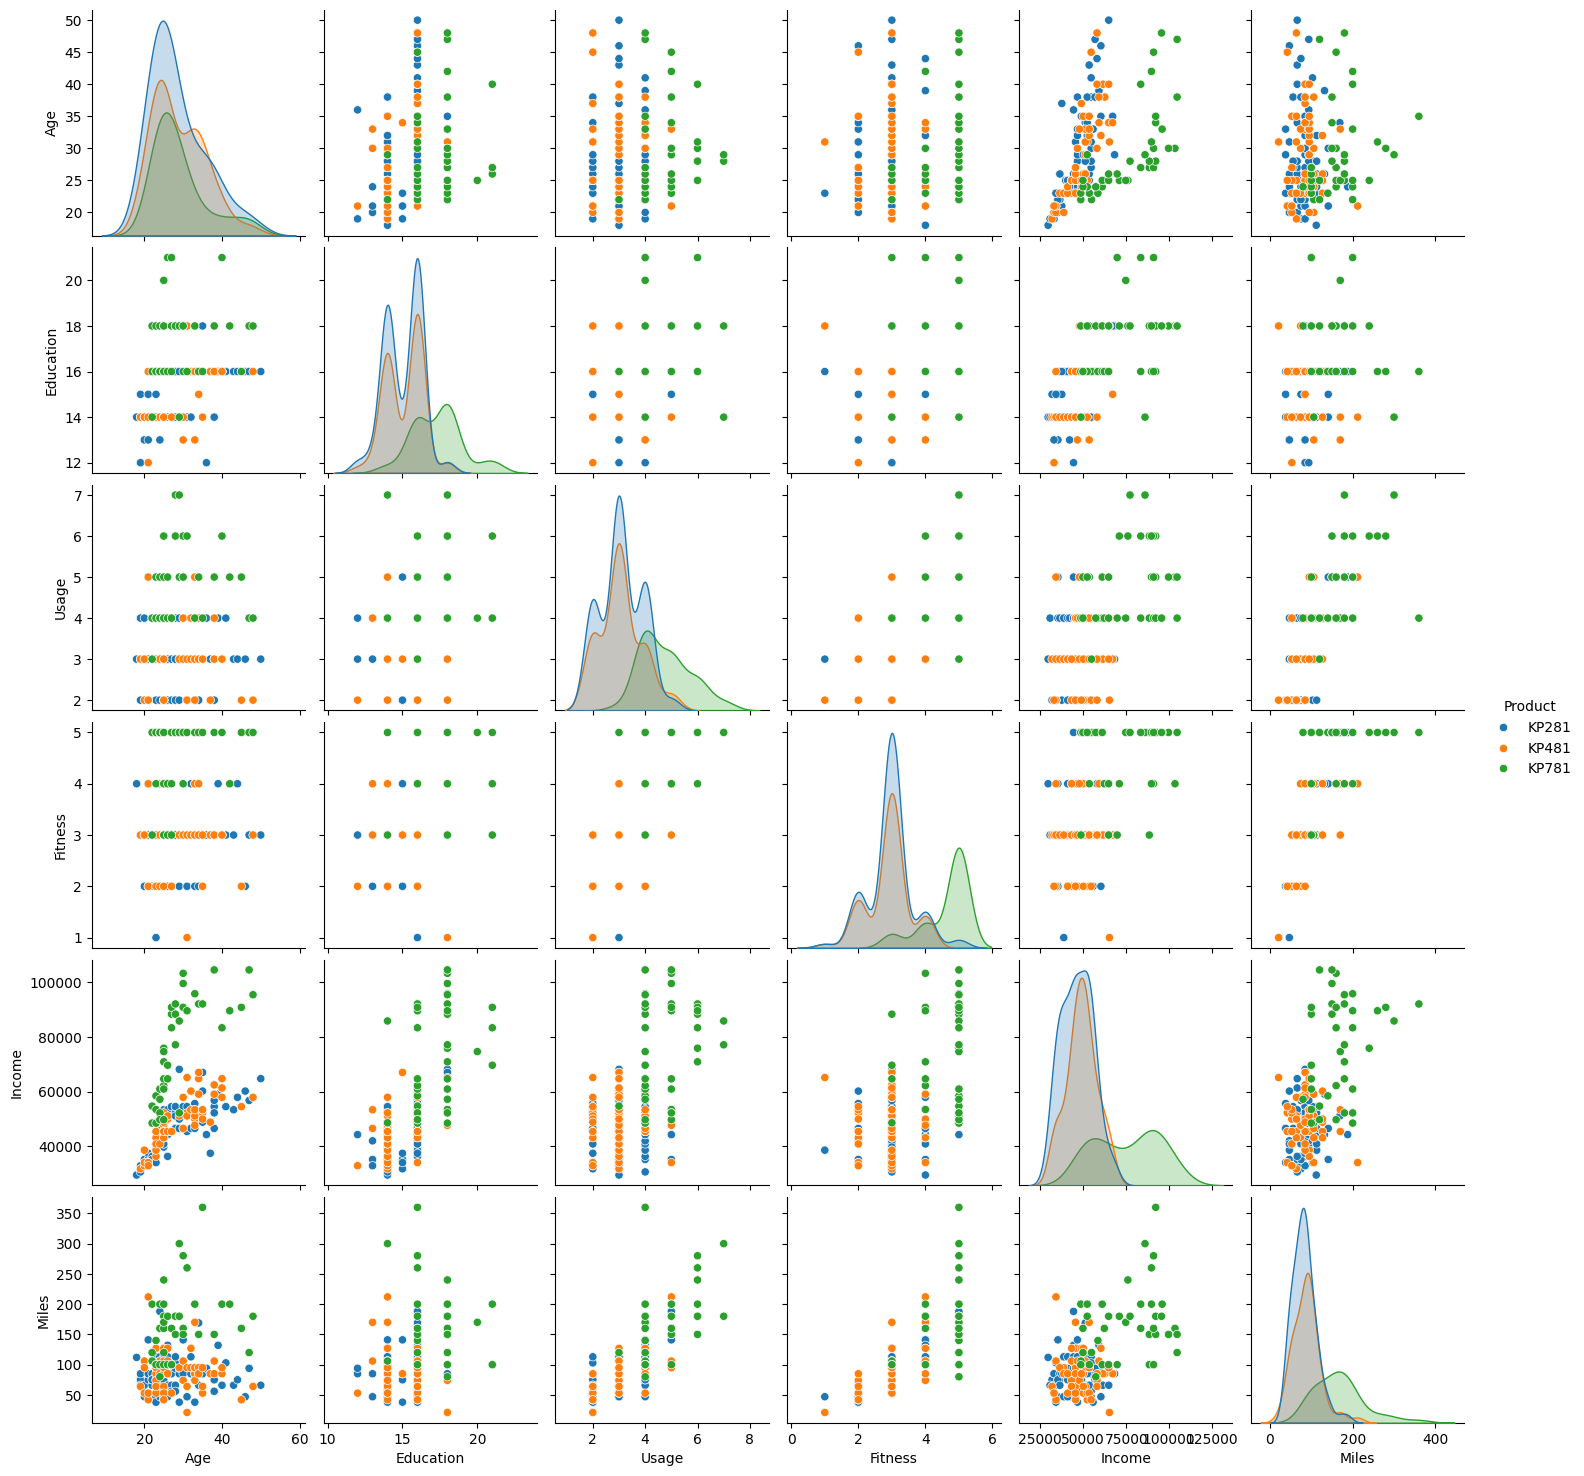

In [53]:
sns.pairplot(data=df,hue='Product')
plt.show()

#TWO-WAY CONTIGENCY TABLE

In [54]:
pd.crosstab([df.Product],df.Gender,margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


Showing male and female count for each prodct.

In [55]:
np.round(((pd.crosstab(df.Product,df.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


Marginal Probability

Probability of male customer buying any product is 57.77%.

Probability of female customer buying any product is 42.22%.



Marginal Probability of Any customer buying

Product KP281:44.44%(Entry Level Product)

Product KP481:33.33%(Intermediate Level Product)

Product KP781:22.22%(Advanced Product)

#Conditional Probability

In [56]:
np.round((pd.crosstab(df.Product,df.Gender,margins=True,normalize="columns"))*100,2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


Probability of selling customer:-

KP281| Female=52%

KP481| Female=38%

KP781| Female=10%

KP281| Male=38%

KP481| Male=30%

KP781| Male=32%

#Customer Profiling

Among the three goods, KP281:
1. This one has the highest sales volume.

2. It is the most reasonably priced product available to buyers.

3. The clients utilize this treadmill, on average, three to four times a week.

4. This product was purchased by clients with incomes between 42,000 and $52,000.

5. People who purchase this product are those who wish to begin exercising.

6. Male and femmale have equal participation for this prduct.

7. Average distance covered by this model is around 70 to 90 miles.

8. Singe female and married male customers bought this product more.

KP481:

1. Because this product is intermediate in difficulty, people with a moderate degree of fitness would benefit most from it.

2. Most preferred both before and after KP 781 and KP 281.

3. Customers' usage behaviors determine their shape, which might range from poor to average to good.

4. The product's users travel between 70 and 130 miles per week.

5. Compared to male buyers, there are more female purchasers for this goods.

6. Customers who purchase this product typically earn between 48k and $49k.

7. The clients utilize this product three times a week on average.

8. Married couples are more likely than singles to favor this product.

9. The age range of KP481 clients is roughly between 24 and 34 years old.

KP781:

1. People prefer this product less than the other two because it is the most expensive and sophisticated of the three.

2. The majority of users of this product have constructed fantastic shapes.

3. The clients utilize this product four to five times every week.

4. Customers who purchase this product earn $75,000 on average annually.

5. Customers that see a high association between education and income like this product.


#Recommendations


 We should recommend KP281 or KP481 to someone who is between the ages of 20 and 35. If they are older than 35, we should recommend KP781 due to its sophisticated features and functions, which will aid in their physical workout.


2. It would be advisable to advertise the KP281 and KP481 as affordable treadmills.


3. Because the KP781 is a more sophisticated device with more functions and capabilities, athletes and professionals might consider using this treadmill for their high-intensity training.

4. A smaller percentage of women purchase fitness equipment.Thus, we should launch a focused marketing effort, particularly for women, motivating them to engage in fitness-related activities that would ultimately result in product sales.

5. Using well-known professionals and celebrities in marketing campaigns and advertisements to promote KP781 will guarantee their reputation in the marketplace.